In [1]:
import sys
sys.path.append("../../helper")
from AnalysisHelper import helper

import pyupbit
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

In [2]:
print(pyupbit.get_tickers(fiat='KRW'))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-HIFI', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 'KRW-SSX', 'KRW-META', 'KRW-FCT2', 'KRW-CB

In [3]:
pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])

{'KRW-BTC': 38730000.0, 'KRW-ETH': 2427000.0}

minute1, minute3, minute5, minute10, minute15, minute30, minute60, minute240, day, week, month	

open: 시가, high: 고가, low: 저가, close: 종가, 거래량: volume, 거래량을 원화로 환산한 가치: value

In [4]:
ticker = 'KRW-BTC'
interval = 'day'
to = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
df = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
df.head()

,open,high,low,close,volume,value
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11
2022-03-30 09:00:00,56985000.0,57100000.0,56015000.0,56620000.0,4136.114493,2.345294e+11


In [5]:
df['price'] = (df['high'] + df['low']) / 2
df.head()

,open,high,low,close,volume,value,price
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11,53821500.0
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11,54937500.0
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11,56752500.0
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11,56965000.0
2022-03-30 09:00:00,56985000.0,57100000.0,56015000.0,56620000.0,4136.114493,2.345294e+11,56557500.0


In [6]:
helper.set_datetime_index(df, inplace=True)

### 데이터 검정

이상치는 보이지만 데이터 자체가 실제 거래 데이터이므로 정상 데이터로 판단함.

결측치 수: 0


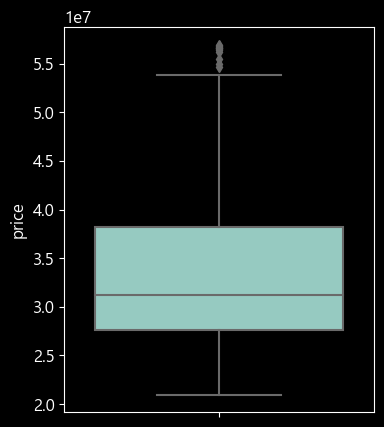

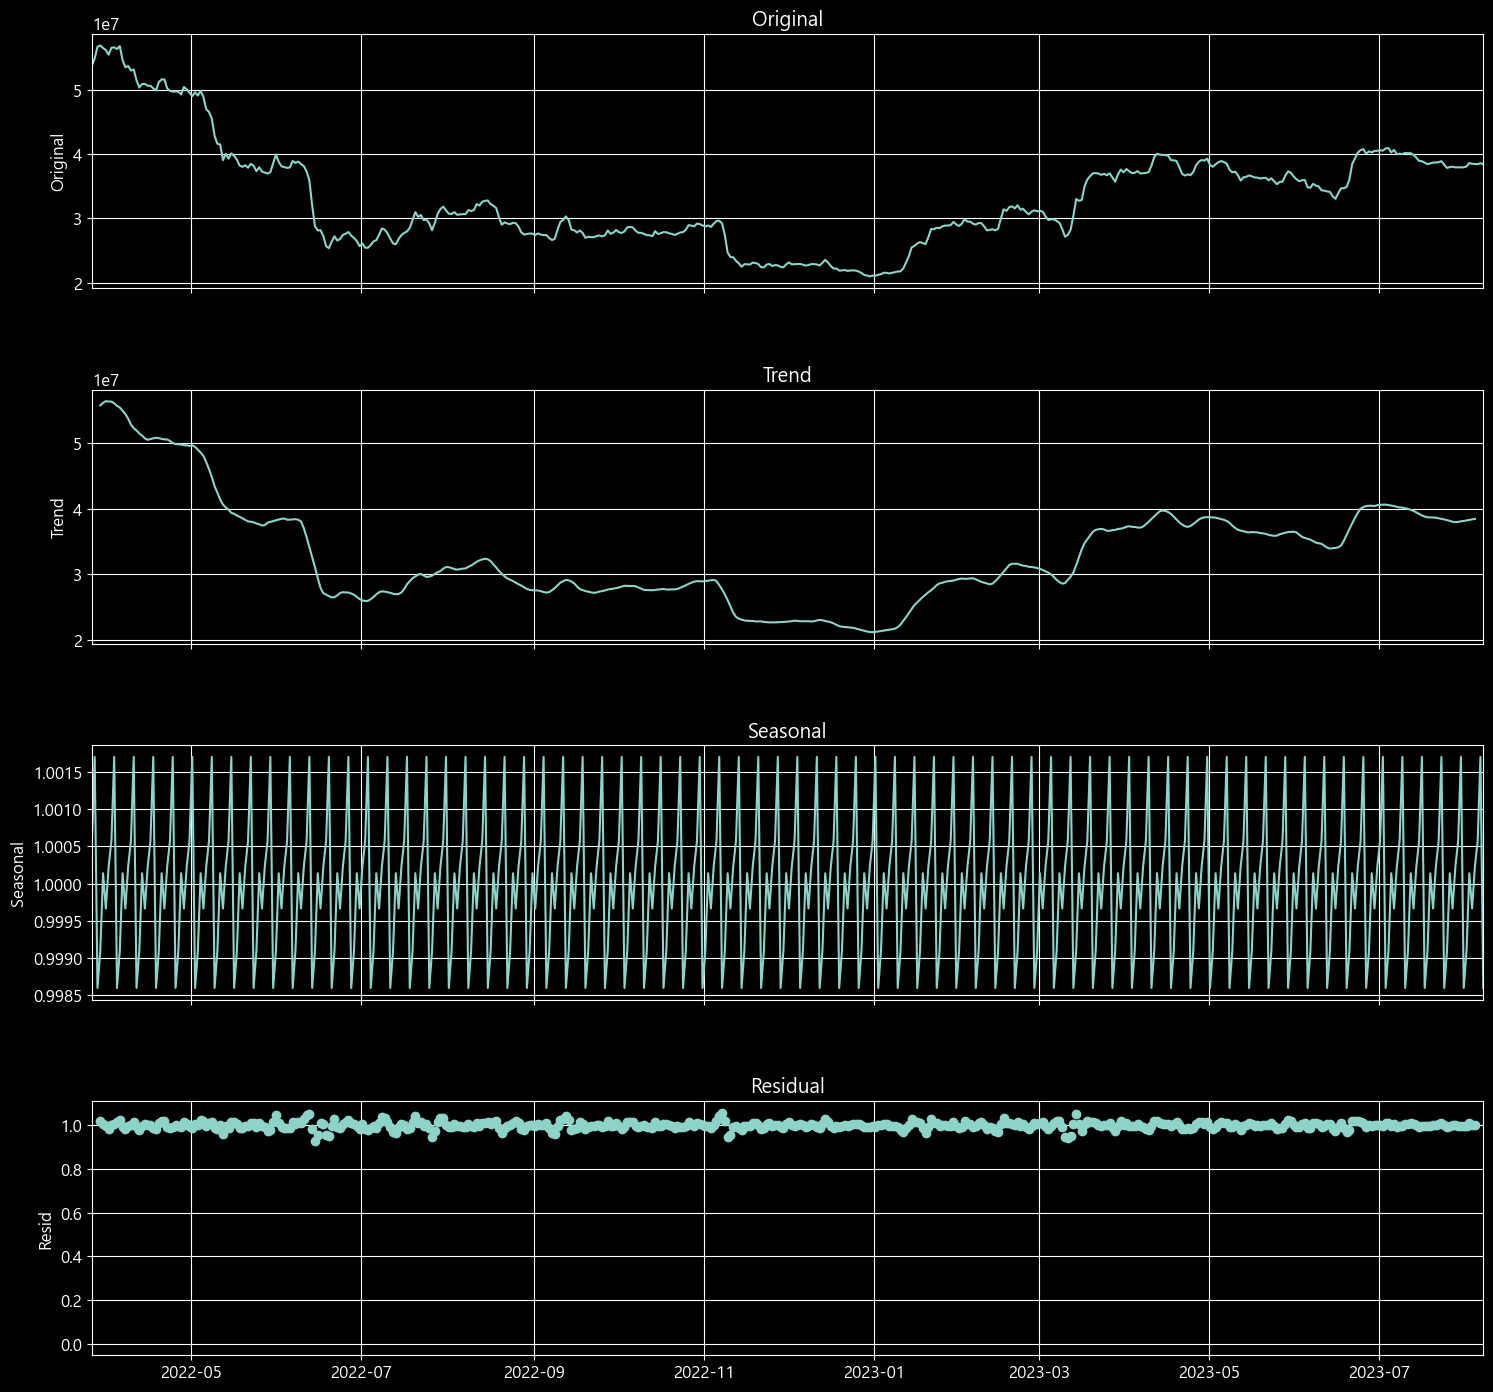

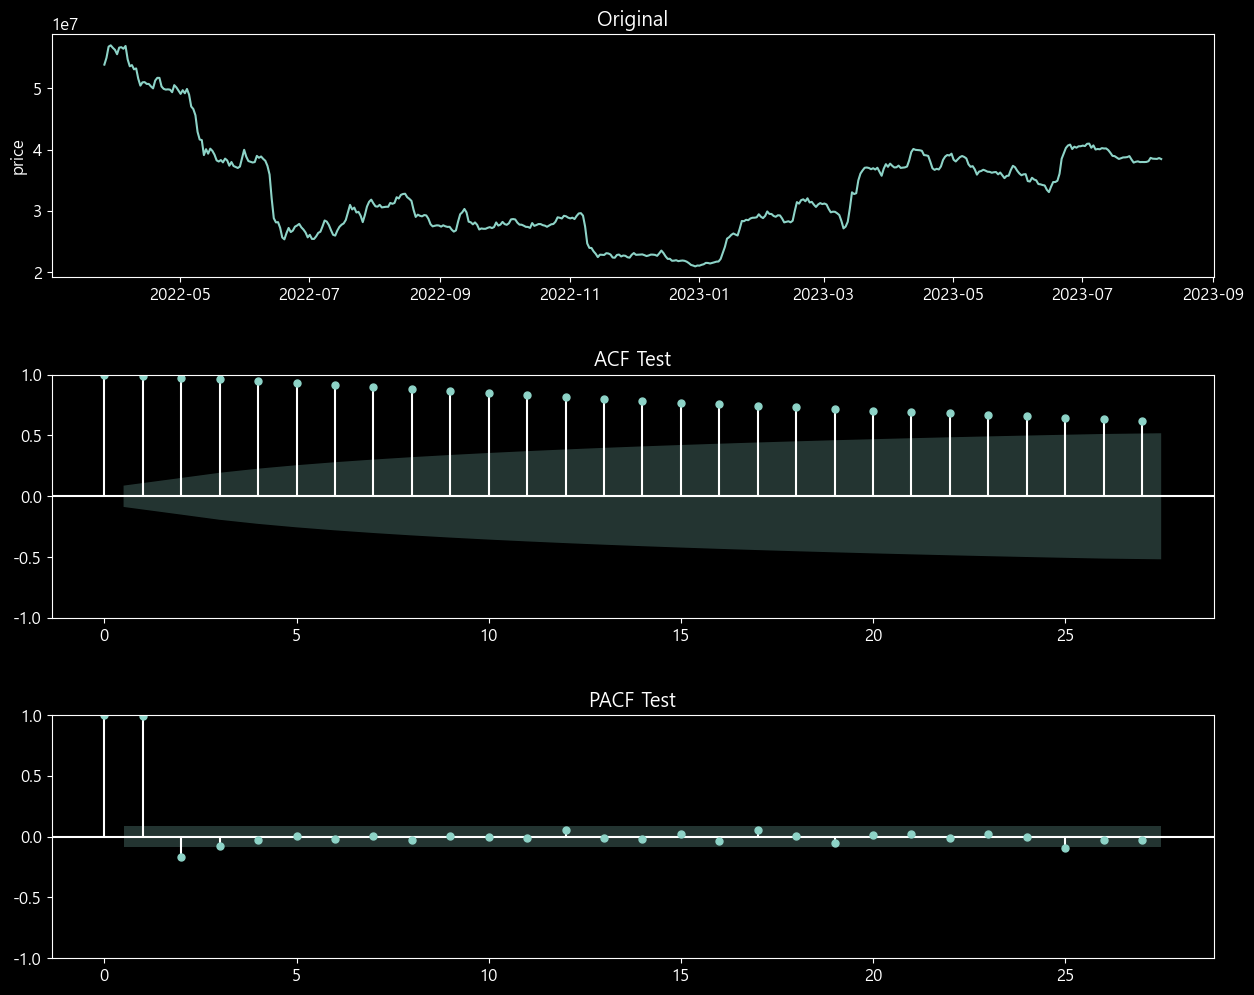

=========== 원본 데이터 ===========
+------------------------------------+-----------+
| ADF Test                           |           |
|------------------------------------+-----------|
| 검정통계량(ADF Statistic)          |  -2.73635 |
| 유의수준(p-value)                  | 0.0679567 |
| 최적차수(num of lags)              |         1 |
| 관측치 개수(num of observations)   |       498 |
| 기각값(Critical Values) 1%         |  -3.44355 |
| 기각값(Critical Values) 5%         |  -2.86736 |
| 기각값(Critical Values) 10%        |  -2.56987 |
| 데이터 정상성 여부(0=Flase,1=True) |         0 |
+------------------------------------+-----------+


In [7]:
helper.exp_time_data(df, 'price', "m")

In [8]:
model = ARIMA(df['price'], order=(1,0,0), seasonal_order=(1,0,0,7))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                           price   No. Observations:                  500
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -7412.640
Date:                         Tue, 08 Aug 2023   AIC                          14833.279
Time:                                 11:55:03   BIC                          14850.138
Sample:                             03-26-2022   HQIC                         14839.895
                                  - 08-07-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.322e+07   5.09e-13   6.53e+19      0.000    3.32e+07    3.32e+07
ar.L1          0.9989      0.001    738.833      0.000     

### 잔차 분석

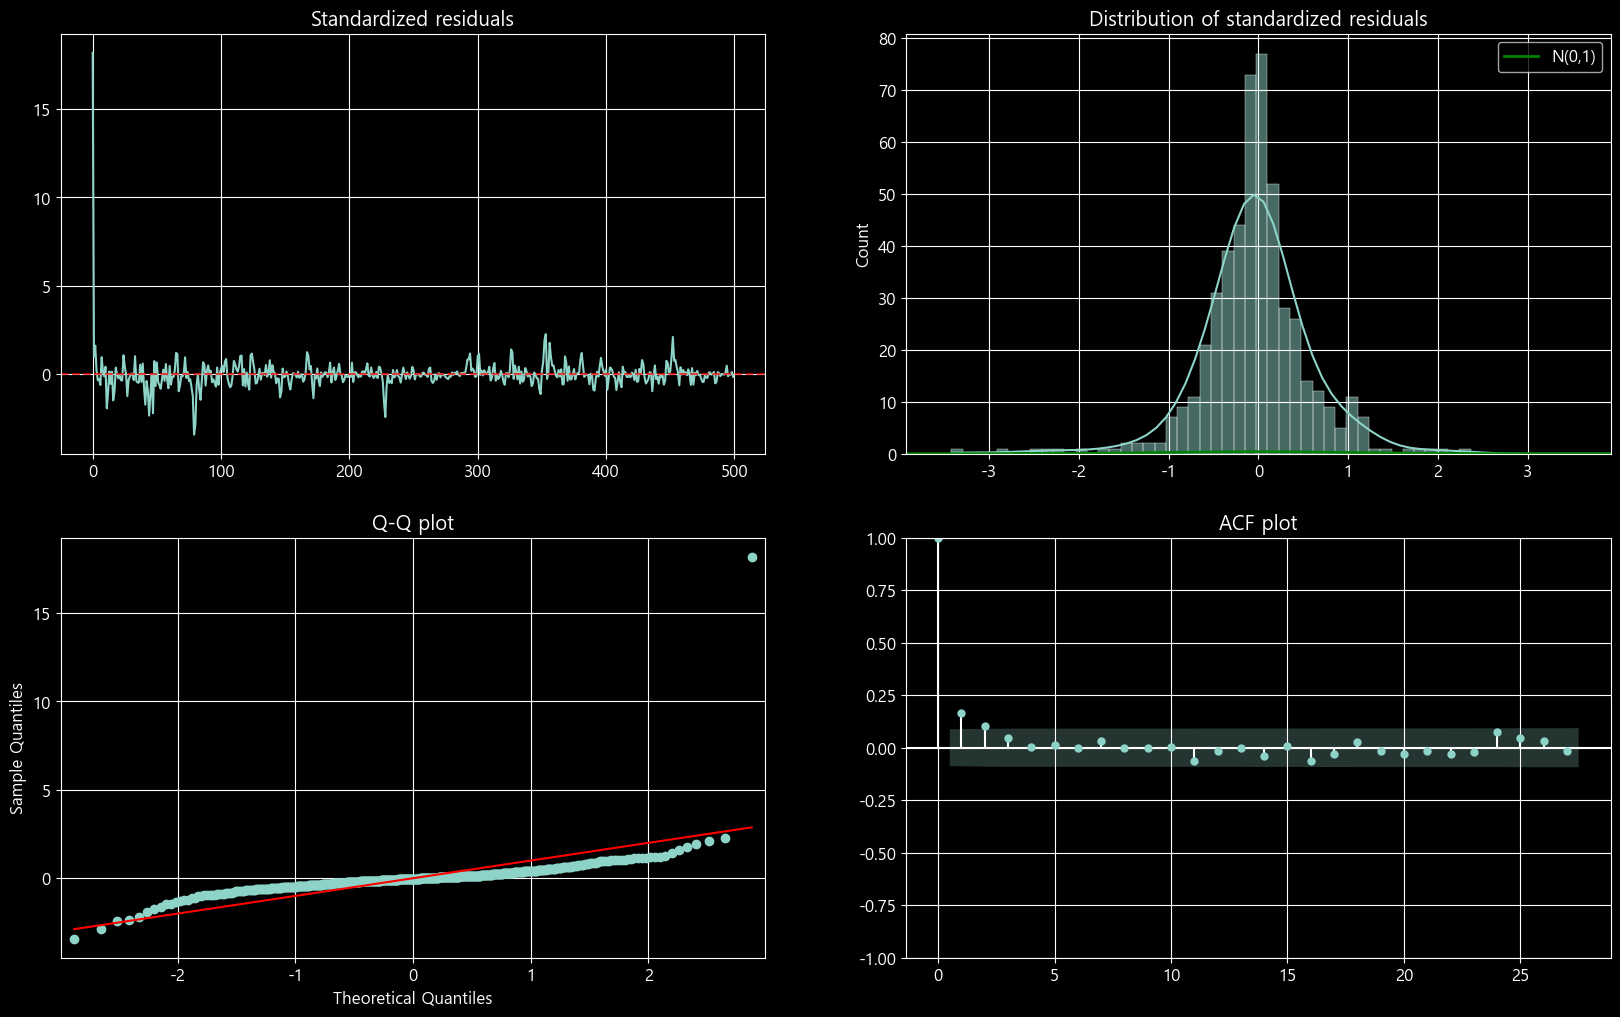

In [9]:
helper.arima_diagnostics(fit.resid)

In [10]:
fv = fit.fittedvalues
fv.head()

2022-03-26 09:00:00    3.321712e+07
2022-03-27 09:00:00    5.379501e+07
2022-03-28 09:00:00    5.490973e+07
2022-03-29 09:00:00    5.672264e+07
2022-03-30 09:00:00    5.693489e+07
Freq: D, dtype: float64

In [11]:
fc = fit.forecast(30)
fc.head()

2023-08-08 09:00:00    3.843125e+07
2023-08-09 09:00:00    3.839279e+07
2023-08-10 09:00:00    3.839421e+07
2023-08-11 09:00:00    3.838943e+07
2023-08-12 09:00:00    3.838417e+07
Freq: D, Name: predicted_mean, dtype: float64

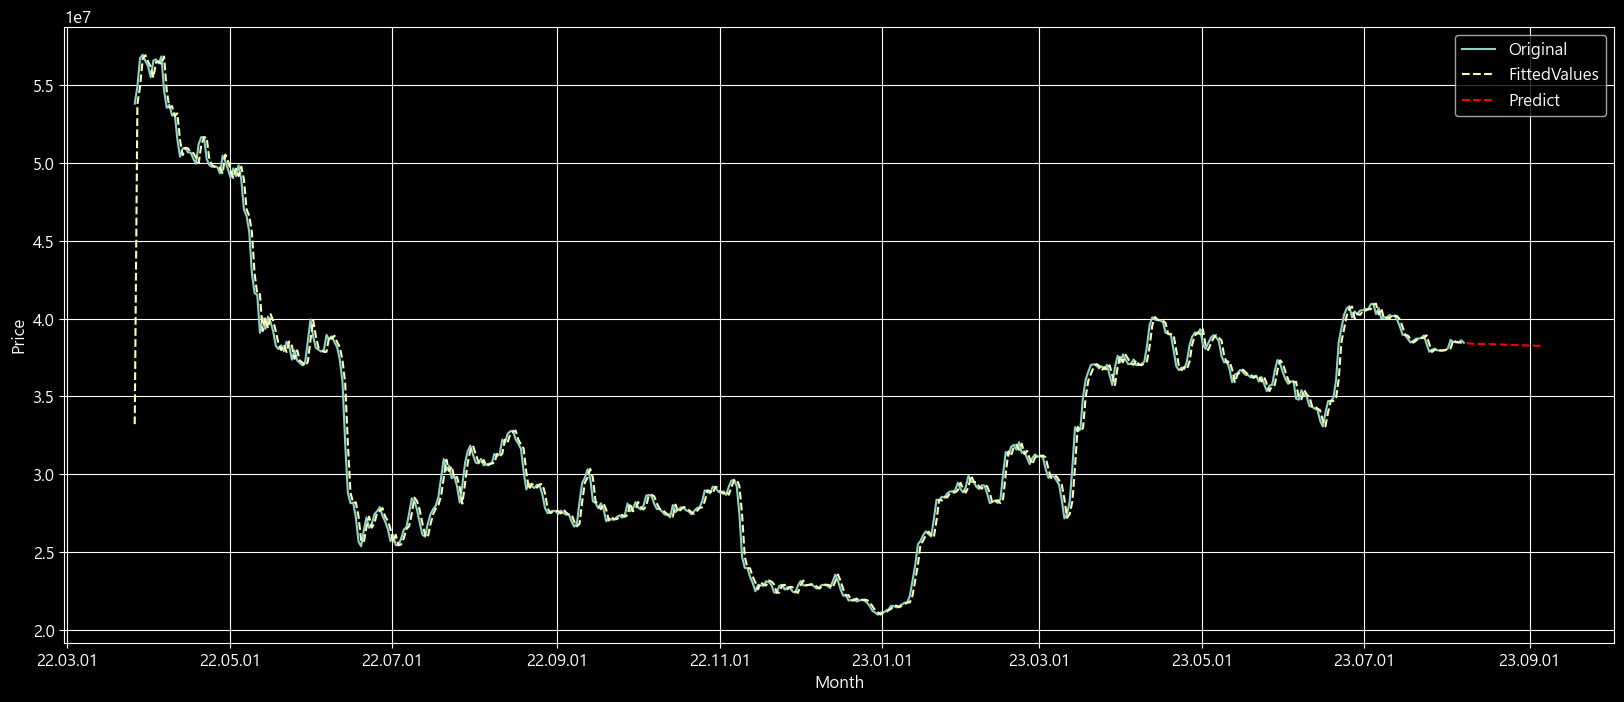

In [12]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

In [13]:
my_p = 1    # AR의 차수 (검증한 결과를 활용)
my_d = 0    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 7    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['price'],       # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=17327.462, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=18768.236, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=17306.499, Time=0.21 sec
 ARIMA(0,0,0)(1,0,0)[7]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,0,0)(1,0,0)[7] intercept
Total fit time: 0.549 seconds
                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                  500
Model:             SARIMAX(1, 0, 0, 7)   Log Likelihood               -8650.250
Date:                 Tue, 08 Aug 2023   AIC                          17306.499
Time:                         11:55:05   BIC                          17319.143
Sample:                     03-26-2022   HQIC                         17311.461
                          - 08-07-2023                                       

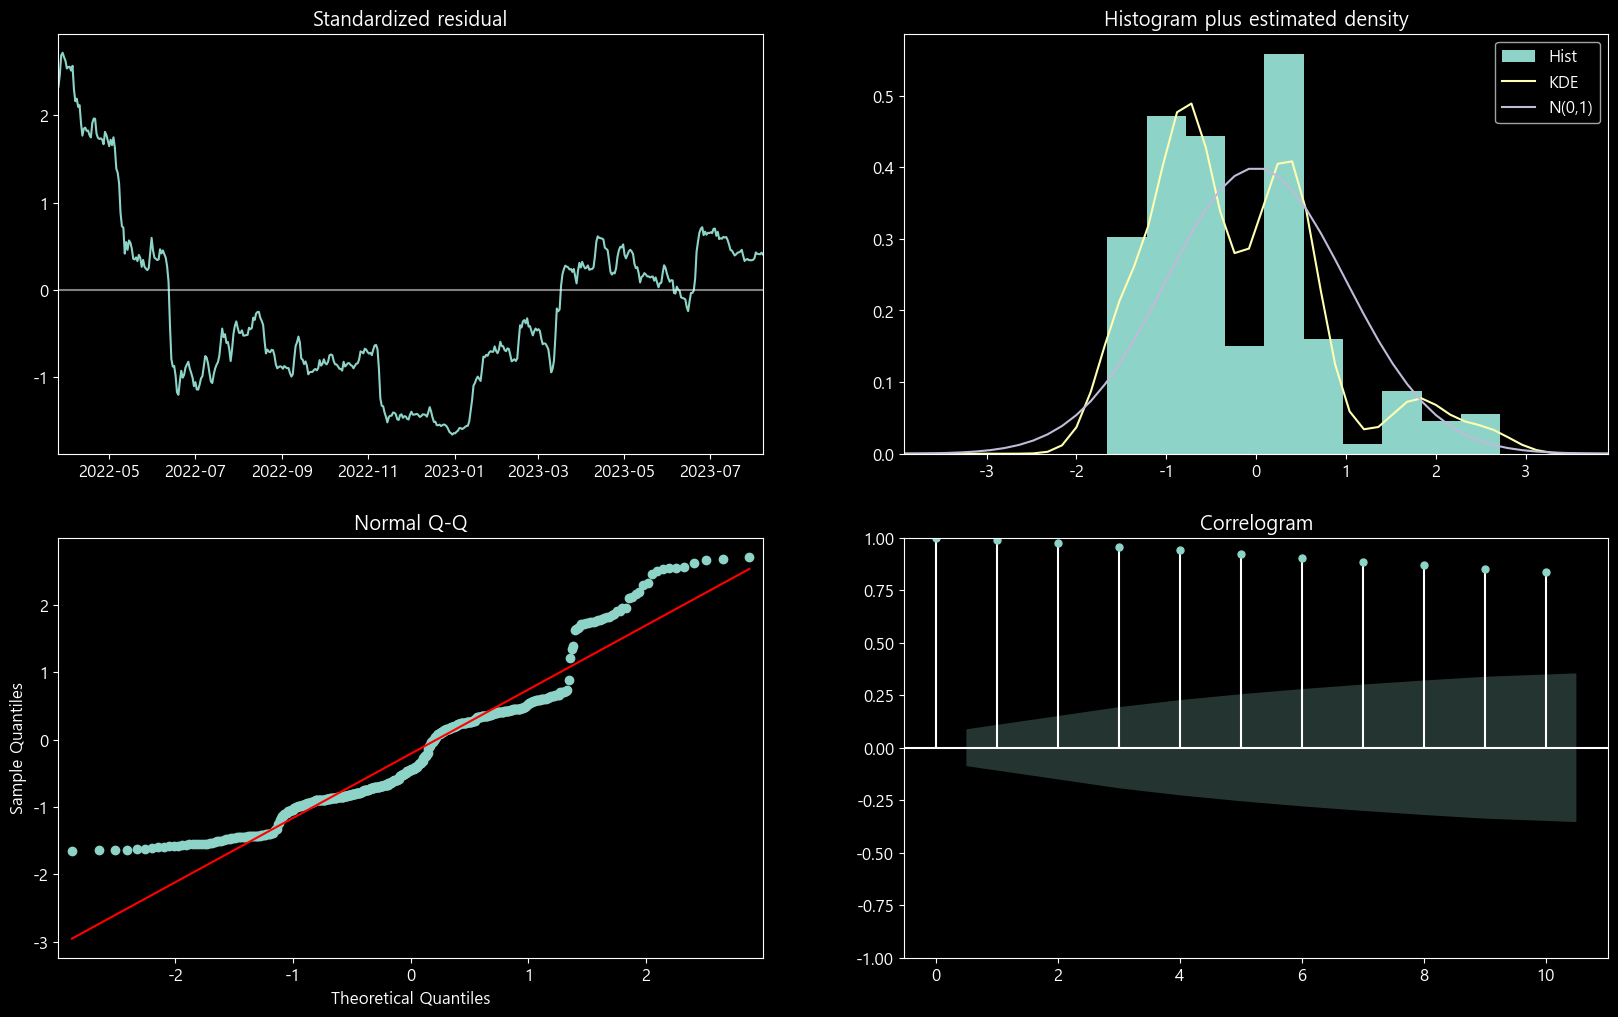

In [14]:
model.plot_diagnostics(figsize=(20, 12))
plt.show()

In [15]:
fv = model.fittedvalues()
fv.head()

2022-03-26 09:00:00    3.501243e+07
2022-03-27 09:00:00    3.501243e+07
2022-03-28 09:00:00    3.501243e+07
2022-03-29 09:00:00    3.501243e+07
2022-03-30 09:00:00    3.501243e+07
Freq: D, dtype: float64

In [16]:
fc = model.predict(n_periods=30)
fc.head()

2023-08-08 09:00:00    3.517059e+07
2023-08-09 09:00:00    3.519826e+07
2023-08-10 09:00:00    3.519164e+07
2023-08-11 09:00:00    3.519036e+07
2023-08-12 09:00:00    3.518949e+07
Freq: D, dtype: float64

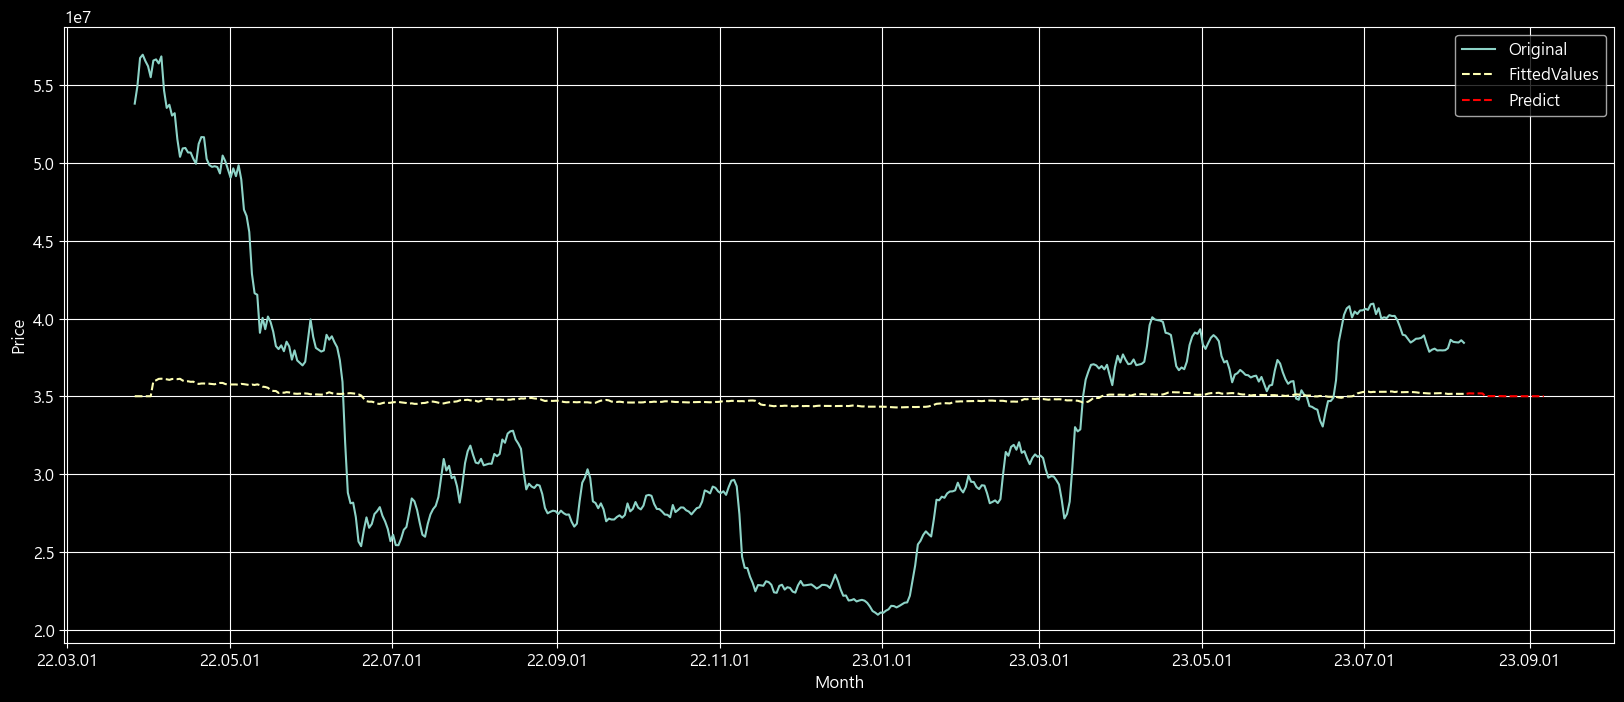

In [17]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()